## Measuring Revitalization in West Bloomington




In [0]:
# Code by: Eva Nautiyal
# Published on: August 23, 2019

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 150

## Creating Dataframe from Raw Data

In [0]:
# imports the data from a google sheet conversion from the original csv
# code from here: https://stackoverflow.com/questions/19611729/getting-google-spreadsheet-csv-into-a-pandas-dataframe

sheet_url = 'https://docs.google.com/spreadsheets/d/1SEI9P_qNzOOQj2uwO6wEsTLjp_TIHlpg0kpqWHeRNfo/edit#gid=924858711'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

# Note: We're going to use 'df' to refer to the dataframe because that is the common convention and will help reduce confusion.
df = pd.read_csv(csv_export_url)

# Check dataframe
df.head()

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2
0,12805,1,3,3,3.0,3,3,3,2,3,2.0,3,3,2.0,408 N LEE,NaN
1,12806,1,2,4,3.0,2,2,3,3,2,2.0,2,2,1.0,508 N LEE,NaN
2,12807,1,2,3,2.0,3,2,2,2,0,2.0,2,2,2.0,510 N LEE,NaN
3,12808,1,2,2,NaN,2,2,2,2,2,2.0,2,2,0.0,611 N LEE,NaN
4,13205,1,3,2,0.0,2,2,2,2,3,2.0,2,0,2.0,412 N LEE,NaN


## Data Cleaning
The first step after import is to verify the integrity of the data. We need to check for missing values, make sure we understand why they are missing, and then develop a procedure for dealing with missing values since many statistical tests and visualizations cannot accept missing values or will eliminate them automatically.

df.info() is a great place to start. 

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 16 columns):
c                       516 non-null int64
Type_                   516 non-null int64
PublicSidewalk          516 non-null int64
Roof                    516 non-null int64
Chimney                 514 non-null float64
Gutter                  516 non-null int64
Siding                  516 non-null int64
Windows                 516 non-null int64
Screens                 516 non-null int64
EntryStairs             516 non-null int64
Porch                   515 non-null float64
Foundation              516 non-null int64
Sidewalk                516 non-null int64
Driveway                506 non-null float64
Address                 512 non-null object
AccessStructureType2    78 non-null object
dtypes: float64(3), int64(11), object(2)
memory usage: 64.6+ KB


**Replacing 0 with NaN for consistency**

In [0]:
#replacing 0 with Nan
df.replace(0, np.nan, inplace=True)
df

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2
0,12805,1,3,3.0,3.0,3.0,3,3,2.0,3.0,2.0,3.0,3.0,2.0,408 N LEE,NaN
1,12806,1,2,4.0,3.0,2.0,2,3,3.0,2.0,2.0,2.0,2.0,1.0,508 N LEE,NaN
2,12807,1,2,3.0,2.0,3.0,2,2,2.0,NaN,2.0,2.0,2.0,2.0,510 N LEE,NaN
3,12808,1,2,2.0,NaN,2.0,2,2,2.0,2.0,2.0,2.0,2.0,NaN,611 N LEE,NaN
4,13205,1,3,2.0,NaN,2.0,2,2,2.0,3.0,2.0,2.0,NaN,2.0,412 N LEE,NaN
5,13206,1,2,2.0,NaN,1.0,2,2,1.0,1.0,1.0,2.0,2.0,2.0,504 N LEE,Shed
6,13207,1,2,2.0,NaN,2.0,2,2,2.0,2.0,NaN,2.0,2.0,2.0,608 N LEE,NaN
7,13208,1,2,3.0,NaN,3.0,3,3,3.0,2.0,2.0,3.0,2.0,2.0,612 N LEE,Garage
8,13210,1,1,2.0,NaN,2.0,2,2,2.0,2.0,3.0,2.0,NaN,2.0,607 N LEE,Fence
9,13212,1,3,4.0,2.0,2.0,2,2,2.0,2.0,3.0,3.0,2.0,3.0,505 N LEE,NaN


## Descriptive Statistics
Descriptive stats help us verify that our data is correct and let us check our understanding of the data as a whole. 

In [0]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c,516.0,44609.341085,19213.478611,12805.0,27211.75,44010.5,61613.25,76015.0
Type_,516.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
PublicSidewalk,516.0,2.085271,0.729740,1.0,2.00,2.0,2.00,4.0
Roof,511.0,2.428571,0.786083,1.0,2.00,2.0,3.00,4.0
Chimney,348.0,2.603448,0.742447,1.0,2.00,3.0,3.00,4.0
Gutter,503.0,2.522863,0.807691,1.0,2.00,2.0,3.00,4.0
Siding,516.0,2.428295,0.758572,1.0,2.00,2.0,3.00,4.0
Windows,516.0,2.447674,0.772824,1.0,2.00,2.0,3.00,4.0
Screens,479.0,2.576200,0.824531,1.0,2.00,2.0,3.00,4.0
EntryStairs,493.0,2.482759,0.817869,1.0,2.00,2.0,3.00,4.0


## Data Visualization

**1** - *Excellent*, **2** - *Good*, **3** - *Fair*, **4** - *Poor*

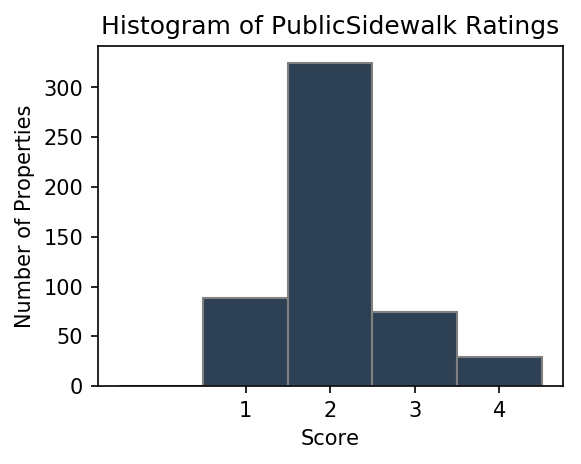

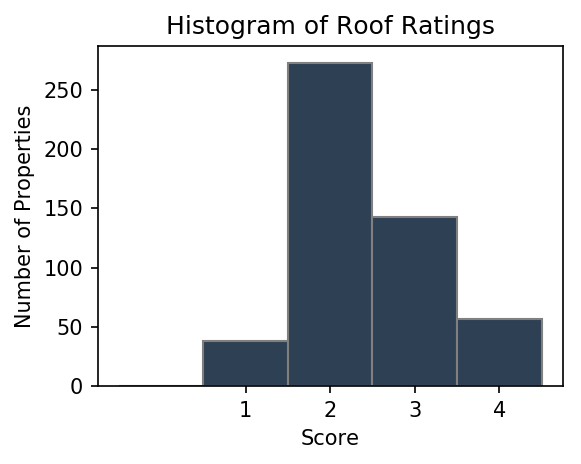

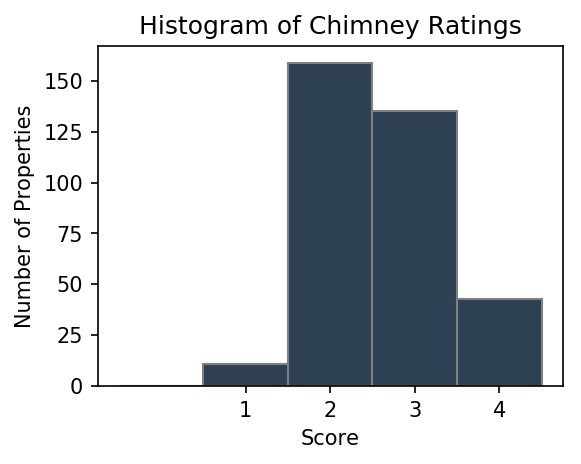

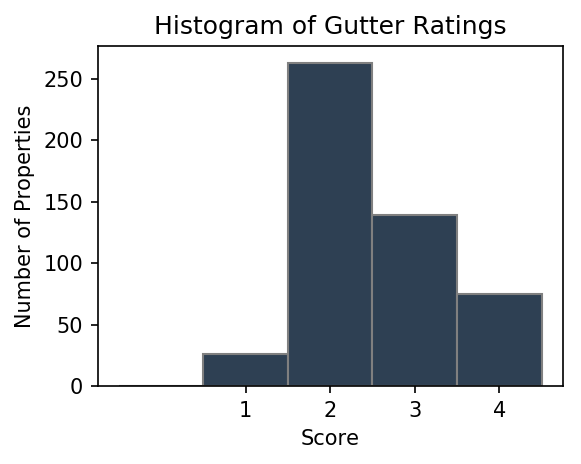

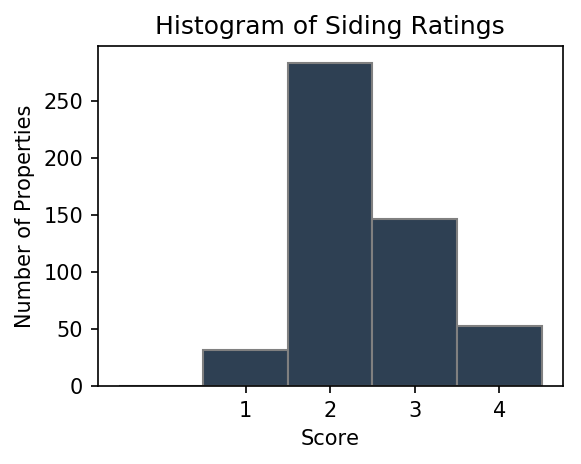

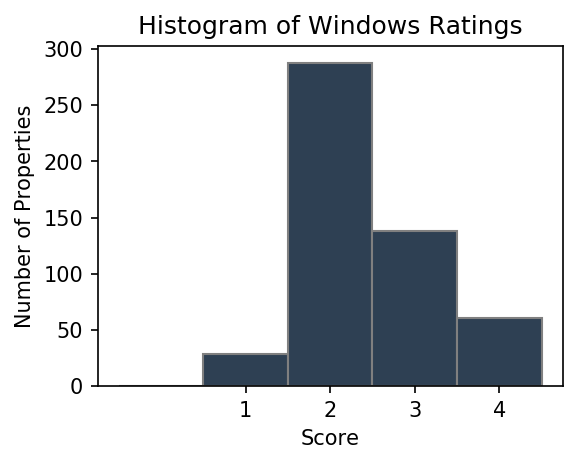

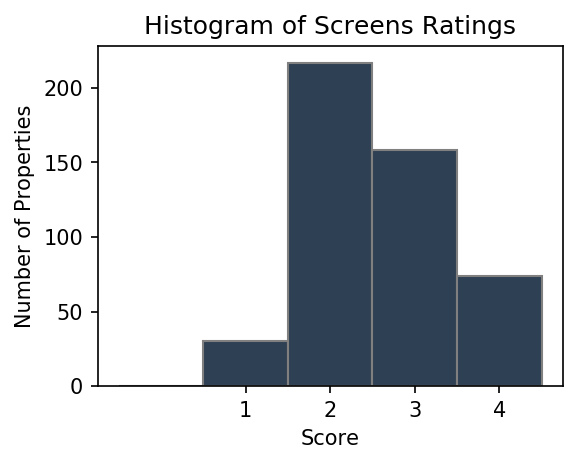

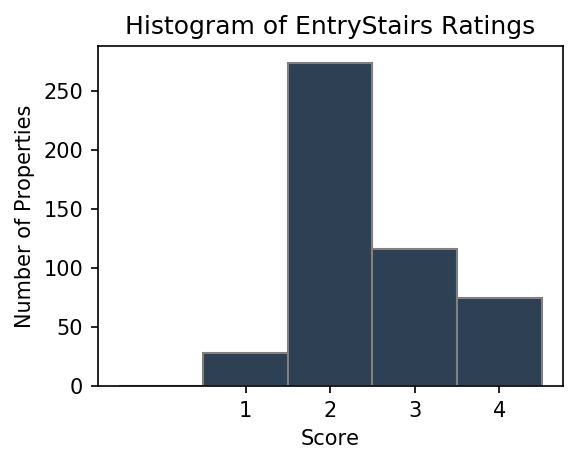

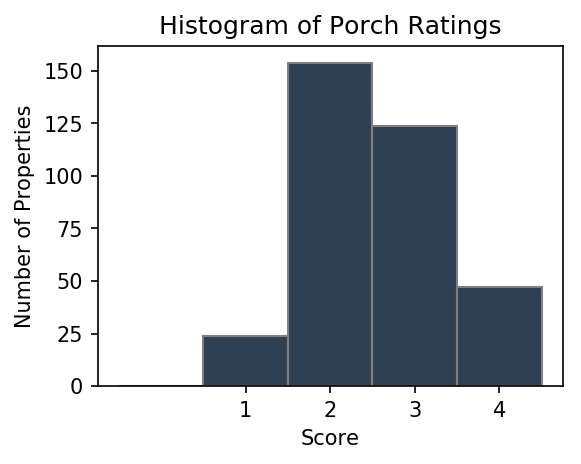

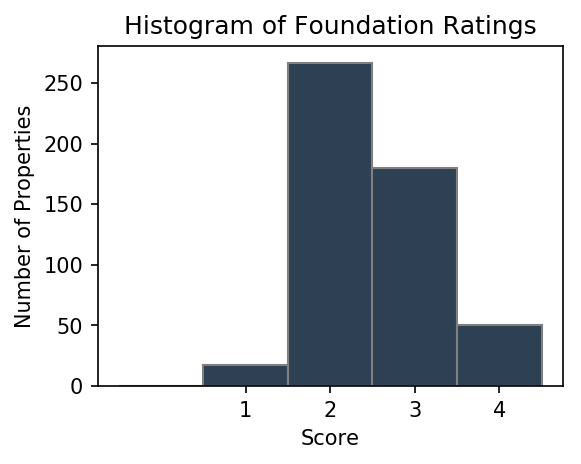

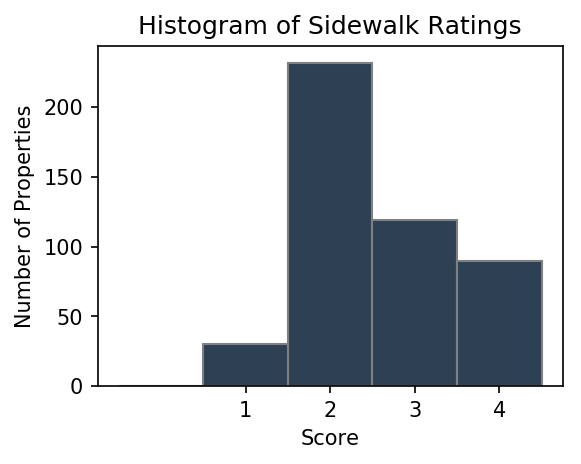

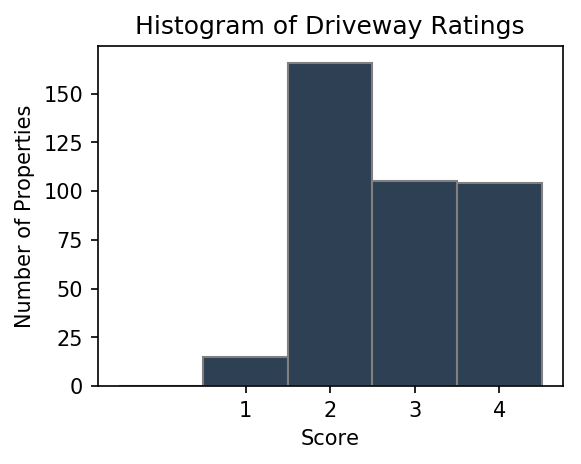

In [0]:
outcomes = df.columns[2:-2]
outcomes

for o in outcomes: 
  plt.hist(df[o], color='#2e4053', edgecolor='grey', bins=np.arange(6)-0.5)
  plt.xlabel("Score")
  plt.ylabel('Number of Properties')
  plt.xticks(range(1, 5))
  plt.title(f"Histogram of {o} Ratings")
  plt.show()

## **Missing Data**

In [0]:
nancolumnlist = df.columns[df.isna().any()]
for c in nancolumnlist: 
  print(c)


Roof
Chimney
Gutter
Screens
EntryStairs
Porch
Foundation
Sidewalk
Driveway
Address
AccessStructureType2


**Replace NaN with 4.0 in Gutter since non-existence is Poor**

In [0]:
df['Gutter'].replace(np.nan, 4.0, inplace=True)
df

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2
0,12805,1,3,3.0,3.0,3.0,3,3,2.0,3.0,2.0,3.0,3.0,2.0,408 N LEE,NaN
1,12806,1,2,4.0,3.0,2.0,2,3,3.0,2.0,2.0,2.0,2.0,1.0,508 N LEE,NaN
2,12807,1,2,3.0,2.0,3.0,2,2,2.0,NaN,2.0,2.0,2.0,2.0,510 N LEE,NaN
3,12808,1,2,2.0,NaN,2.0,2,2,2.0,2.0,2.0,2.0,2.0,NaN,611 N LEE,NaN
4,13205,1,3,2.0,NaN,2.0,2,2,2.0,3.0,2.0,2.0,NaN,2.0,412 N LEE,NaN
5,13206,1,2,2.0,NaN,1.0,2,2,1.0,1.0,1.0,2.0,2.0,2.0,504 N LEE,Shed
6,13207,1,2,2.0,NaN,2.0,2,2,2.0,2.0,NaN,2.0,2.0,2.0,608 N LEE,NaN
7,13208,1,2,3.0,NaN,3.0,3,3,3.0,2.0,2.0,3.0,2.0,2.0,612 N LEE,Garage
8,13210,1,1,2.0,NaN,2.0,2,2,2.0,2.0,3.0,2.0,NaN,2.0,607 N LEE,Fence
9,13212,1,3,4.0,2.0,2.0,2,2,2.0,2.0,3.0,3.0,2.0,3.0,505 N LEE,NaN


In [0]:
for c in nancolumnlist:
  dfnan = df[df[c].isna() == True]
  display(dfnan.head(10))
  print(c, 'Rows Containing NaN Values')

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2
12,13605,1,2,NaN,NaN,2.0,3,2,3.0,2.0,3.0,2.0,NaN,3.0,500 N LEE,NaN
44,18807,1,2,NaN,3.0,4.0,3,3,3.0,4.0,4.0,4.0,3.0,4.0,518 W GROVE,NaN
120,26810,1,2,NaN,NaN,3.0,2,2,3.0,1.0,NaN,3.0,NaN,NaN,908 w Jefferson,NaN
326,54808,1,2,NaN,4.0,3.0,3,4,4.0,NaN,NaN,4.0,2.0,NaN,712 W. Front St.,NaN
477,73210,1,2,NaN,NaN,2.0,2,2,3.0,3.0,NaN,2.0,2.0,NaN,710 W. Mulberry St.,NaN


Roof Rows Containing NaN Values


,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2
3,12808,1,2,2.0,NaN,2.0,2,2,2.0,2.0,2.0,2.0,2.0,NaN,611 N LEE,NaN
4,13205,1,3,2.0,NaN,2.0,2,2,2.0,3.0,2.0,2.0,NaN,2.0,412 N LEE,NaN
5,13206,1,2,2.0,NaN,1.0,2,2,1.0,1.0,1.0,2.0,2.0,2.0,504 N LEE,Shed
6,13207,1,2,2.0,NaN,2.0,2,2,2.0,2.0,NaN,2.0,2.0,2.0,608 N LEE,NaN
7,13208,1,2,3.0,NaN,3.0,3,3,3.0,2.0,2.0,3.0,2.0,2.0,612 N LEE,Garage
8,13210,1,1,2.0,NaN,2.0,2,2,2.0,2.0,3.0,2.0,NaN,2.0,607 N LEE,Fence
10,13213,1,3,2.0,NaN,4.0,2,2,3.0,3.0,3.0,3.0,2.0,3.0,503 N LEE,NaN
12,13605,1,2,NaN,NaN,2.0,3,2,3.0,2.0,3.0,2.0,NaN,3.0,500 N LEE,NaN
18,13614,1,2,3.0,NaN,2.0,2,2,2.0,2.0,3.0,2.0,4.0,2.0,405 N LEE,NaN
20,14006,1,1,2.0,NaN,2.0,2,3,2.0,4.0,NaN,2.0,4.0,NaN,603 N LEE,NaN


Chimney Rows Containing NaN Values


,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2


Gutter Rows Containing NaN Values


,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2
17,13613,1,2,2.0,2.0,2.0,2,3,NaN,2.0,NaN,2.0,2.0,2.0,411 N LEE,NaN
22,14008,1,2,1.0,2.0,4.0,2,2,NaN,2.0,2.0,2.0,2.0,3.0,507 N LEE,NaN
25,14809,1,2,2.0,3.0,3.0,2,2,NaN,2.0,2.0,3.0,4.0,2.0,906 w washington,NaN
29,16405,1,2,4.0,NaN,3.0,3,4,NaN,NaN,NaN,3.0,4.0,3.0,901 w washington,NaN
32,17205,1,2,3.0,NaN,3.0,2,3,NaN,2.0,3.0,2.0,3.0,3.0,902.5 w Washington,NaN
46,18809,1,2,4.0,2.0,3.0,2,2,NaN,2.0,2.0,3.0,2.0,2.0,810 w washington,Fence
50,19211,1,2,2.0,NaN,2.0,2,2,NaN,2.0,2.0,2.0,2.0,2.0,514 W GROVE,Fence
59,19614,1,1,3.0,2.0,2.0,2,3,NaN,2.0,NaN,2.0,4.0,4.0,808 w washington,Fence
73,20810,1,2,2.0,NaN,2.0,3,3,NaN,4.0,3.0,3.0,2.0,NaN,606 W GROVE,Shed
77,21208,1,2,2.0,3.0,2.0,2,3,NaN,2.0,3.0,3.0,2.0,NaN,528 W GROVE,NaN


Screens Rows Containing NaN Values


,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2
2,12807,1,2,3.0,2.0,3.0,2,2,2.0,NaN,2.0,2.0,2.0,2.0,510 N LEE,NaN
23,14406,1,2,2.0,NaN,2.0,2,2,2.0,NaN,2.0,2.0,2.0,NaN,903.5 w washington,NaN
29,16405,1,2,4.0,NaN,3.0,3,4,NaN,NaN,NaN,3.0,4.0,3.0,901 w washington,NaN
65,20011,1,1,2.0,NaN,2.0,2,2,2.0,NaN,NaN,2.0,2.0,2.0,816 w washington,NaN
81,22808,1,2,3.0,NaN,4.0,2,2,2.0,NaN,NaN,2.0,4.0,3.0,203 n Allin,NaN
109,25615,1,2,2.0,NaN,2.0,2,2,3.0,NaN,NaN,3.0,2.0,2.0,314 S Allin,NaN
135,28010,1,1,1.0,NaN,1.0,1,1,1.0,NaN,NaN,1.0,1.0,1.0,907 w Jefferson,NaN
149,30412,1,1,1.0,NaN,1.0,1,1,1.0,NaN,NaN,1.0,1.0,1.0,717 W Jefferson,Garage
156,30810,1,1,2.0,NaN,2.0,2,2,2.0,NaN,NaN,2.0,2.0,2.0,715 W Jefferson,NaN
176,32010,1,2,2.0,NaN,2.0,2,2,2.0,NaN,NaN,2.0,2.0,2.0,609 W Monroe,NaN


EntryStairs Rows Containing NaN Values


,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2
6,13207,1,2,2.0,NaN,2.0,2,2,2.0,2.0,NaN,2.0,2.0,2.0,608 N LEE,NaN
13,13606,1,2,2.0,2.0,3.0,2,3,3.0,3.0,NaN,3.0,4.0,3.0,502 LEE,NaN
16,13612,1,1,2.0,2.0,2.0,2,2,2.0,2.0,NaN,2.0,2.0,2.0,601 N LEE,NaN
17,13613,1,2,2.0,2.0,2.0,2,3,NaN,2.0,NaN,2.0,2.0,2.0,411 N LEE,NaN
20,14006,1,1,2.0,NaN,2.0,2,3,2.0,4.0,NaN,2.0,4.0,NaN,603 N LEE,NaN
29,16405,1,2,4.0,NaN,3.0,3,4,NaN,NaN,NaN,3.0,4.0,3.0,901 w washington,NaN
33,17605,1,2,2.0,2.0,2.0,2,2,2.0,2.0,NaN,3.0,3.0,3.0,912 w Washington,Fence
47,19208,1,2,2.0,3.0,3.0,3,4,4.0,3.0,NaN,3.0,4.0,2.0,201 S LEE,NaN
59,19614,1,1,3.0,2.0,2.0,2,3,NaN,2.0,NaN,2.0,4.0,4.0,808 w washington,Fence
65,20011,1,1,2.0,NaN,2.0,2,2,2.0,NaN,NaN,2.0,2.0,2.0,816 w washington,NaN


Porch Rows Containing NaN Values


,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2
495,74809,1,3,2.0,NaN,4.0,2,3,3.0,2.0,NaN,NaN,3.0,NaN,713 W. Mulberry St.,NaN
510,76009,1,2,2.0,2.0,2.0,2,2,2.0,2.0,NaN,NaN,NaN,3.0,706 W. Locust St.,Fence


Foundation Rows Containing NaN Values


,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2
4,13205,1,3,2.0,NaN,2.0,2,2,2.0,3.0,2.0,2.0,NaN,2.0,412 N LEE,NaN
8,13210,1,1,2.0,NaN,2.0,2,2,2.0,2.0,3.0,2.0,NaN,2.0,607 N LEE,Fence
12,13605,1,2,NaN,NaN,2.0,3,2,3.0,2.0,3.0,2.0,NaN,3.0,500 N LEE,NaN
41,18416,1,2,2.0,NaN,2.0,2,2,3.0,2.0,2.0,2.0,NaN,3.0,508 W GROVE,NaN
51,19214,1,2,4.0,4.0,4.0,4,4,4.0,3.0,3.0,4.0,NaN,2.0,812 w Washington,Fence
97,25208,1,2,4.0,4.0,4.0,3,3,NaN,3.0,NaN,3.0,NaN,4.0,104 S Allin,Shed
100,25211,1,2,3.0,NaN,3.0,4,4,4.0,4.0,NaN,4.0,NaN,4.0,301 S Low,NaN
104,25610,1,2,4.0,NaN,4.0,3,4,NaN,4.0,4.0,4.0,NaN,NaN,302 S Allin,NaN
118,26808,1,2,3.0,3.0,3.0,2,2,2.0,2.0,2.0,2.0,NaN,NaN,914 w Jefferson,NaN
120,26810,1,2,NaN,NaN,3.0,2,2,3.0,1.0,NaN,3.0,NaN,NaN,908 w Jefferson,NaN


Sidewalk Rows Containing NaN Values


,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2
3,12808,1,2,2.0,NaN,2.0,2,2,2.0,2.0,2.0,2.0,2.0,NaN,611 N LEE,NaN
20,14006,1,1,2.0,NaN,2.0,2,3,2.0,4.0,NaN,2.0,4.0,NaN,603 N LEE,NaN
23,14406,1,2,2.0,NaN,2.0,2,2,2.0,NaN,2.0,2.0,2.0,NaN,903.5 w washington,NaN
27,16005,1,1,2.0,NaN,2.0,2,2,2.0,2.0,2.0,3.0,3.0,NaN,905 w Washington,NaN
34,18405,1,2,2.0,3.0,3.0,2,3,3.0,2.0,3.0,2.0,2.0,NaN,111 S LEE,NaN
35,18406,1,2,2.0,NaN,2.0,3,3,3.0,2.0,2.0,2.0,3.0,NaN,109 S LEE,NaN
53,19608,1,2,3.0,3.0,2.0,4,4,4.0,4.0,3.0,2.0,4.0,NaN,513 W GROVE,NaN
68,20406,1,2,2.0,NaN,2.0,2,2,2.0,2.0,3.0,3.0,3.0,NaN,535 W GROVE,NaN
71,20807,1,2,2.0,3.0,2.0,2,2,2.0,4.0,3.0,2.0,2.0,NaN,541 W GROVE,NaN
73,20810,1,2,2.0,NaN,2.0,3,3,NaN,4.0,3.0,3.0,2.0,NaN,606 W GROVE,Shed


Driveway Rows Containing NaN Values


,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2
191,34009,1,2,3.0,3.0,2.0,2,3,NaN,4.0,4.0,3.0,3.0,NaN,NaN,NaN
192,34011,1,2,2.0,2.0,2.0,2,2,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
277,47211,1,1,2.0,NaN,2.0,3,2,2.0,3.0,NaN,2.0,1.0,3.0,NaN,Garage
278,47608,1,3,1.0,NaN,2.0,1,1,NaN,NaN,NaN,2.0,NaN,3.0,NaN,Fence


Address Rows Containing NaN Values


,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2
0,12805,1,3,3.0,3.0,3.0,3,3,2.0,3.0,2.0,3.0,3.0,2.0,408 N LEE,NaN
1,12806,1,2,4.0,3.0,2.0,2,3,3.0,2.0,2.0,2.0,2.0,1.0,508 N LEE,NaN
2,12807,1,2,3.0,2.0,3.0,2,2,2.0,NaN,2.0,2.0,2.0,2.0,510 N LEE,NaN
3,12808,1,2,2.0,NaN,2.0,2,2,2.0,2.0,2.0,2.0,2.0,NaN,611 N LEE,NaN
4,13205,1,3,2.0,NaN,2.0,2,2,2.0,3.0,2.0,2.0,NaN,2.0,412 N LEE,NaN
6,13207,1,2,2.0,NaN,2.0,2,2,2.0,2.0,NaN,2.0,2.0,2.0,608 N LEE,NaN
9,13212,1,3,4.0,2.0,2.0,2,2,2.0,2.0,3.0,3.0,2.0,3.0,505 N LEE,NaN
10,13213,1,3,2.0,NaN,4.0,2,2,3.0,3.0,3.0,3.0,2.0,3.0,503 N LEE,NaN
11,13214,1,1,3.0,2.0,2.0,2,3,3.0,2.0,2.0,2.0,2.0,2.0,407 N LEE,NaN
12,13605,1,2,NaN,NaN,2.0,3,2,3.0,2.0,3.0,2.0,NaN,3.0,500 N LEE,NaN


AccessStructureType2 Rows Containing NaN Values


In [0]:
# number of rows which are empty
df.isna().sum()

c                         0
Type_                     0
PublicSidewalk            0
Roof                      5
Chimney                 168
Gutter                    0
Siding                    0
Windows                   0
Screens                  37
EntryStairs              23
Porch                   167
Foundation                2
Sidewalk                 45
Driveway                126
Address                   4
AccessStructureType2    438
dtype: int64

##Overall Structure Ranking
Here I created new variables like RoofW, ChimneyW, ScreensW etc to indicate that these are the weighted scores. Subsequently, I have RoofU, ChimneyU, ScreensU etc to indicate the unweighted scores for comparison. 


The building component rankings were weighted for the overall structure ranking
based on the components importance to the structural integrity of the building. The most important components, vital to structural integrity, included: foundation, roof, exterior walls, and windows; these components were weighted to contribute to 90% of the structures overall ranking. The weight of the components rankings are listed below in percentages:

1. Foundation: 30%

2. Roof: 30%

3. Siding: 20%

4. Windows: 10%

5. Porch: 2%

6. Porch Steps: 2%

7. Screens/Storms: 1%

8. Chimney Tower: 1%

9. Guttering: 1%

10. Accessory Structure: 1%

11. Garage: 1%

12. Sidewalk/Drive: 1%

Total: 100%

The overall ranking was calculated (see equation below) by multiplying the components rank by its assigned weight. Each weighted ranking was totaled and divided by the total of potential weights.

Because we don't have an exterior wall rating for 2018 data, we will distribute the weight of that component.  Option: make Foundation and Roof 40% each 


In [0]:
weightedlist = ['FoundationW', 'RoofW', 'WindowsW', 'SidingW', 'PorchW', 'ChimneyW', 'GutterW', 'EntryStairsW', 'SidewalkW', 'ScreensW']

df['FoundationW'] = df['Foundation'].fillna(df['Foundation'].mean()) * 0.30
df['RoofW'] = df['Roof'].fillna(df['Roof'].mean())*0.30
df['SidingW'] = df['Siding'].fillna(df['Siding'].mean())*0.20
df['WindowsW'] = df['Windows'].fillna(df['Windows'].mean())*0.10
df['PorchW'] = df['Porch'].fillna(df['Porch'].mean())*0.02
df['EntryStairsW'] = df['EntryStairs'].fillna(df['EntryStairs'].mean())*0.02
df['ScreensW'] = df['Screens'].fillna(df['Screens'].mean())*0.01
df['ChimneyW'] = df['Chimney'].fillna(df['Chimney'].mean())*0.01
df['GutterW'] = df['Gutter'].fillna(df['Gutter'].mean())*0.01
df['SidewalkW'] = df['Sidewalk'].fillna(df['Sidewalk'].mean())*0.01

df[weightedlist].isna().sum()

FoundationW     0
RoofW           0
WindowsW        0
SidingW         0
PorchW          0
ChimneyW        0
GutterW         0
EntryStairsW    0
SidewalkW       0
ScreensW        0
dtype: int64

In [0]:
df[weightedlist].mean()

FoundationW     0.753502
RoofW           0.728571
WindowsW        0.244767
SidingW         0.485659
PorchW          0.051117
ChimneyW        0.026034
GutterW         0.025601
EntryStairsW    0.049655
SidewalkW       0.025711
ScreensW        0.025762
dtype: float64

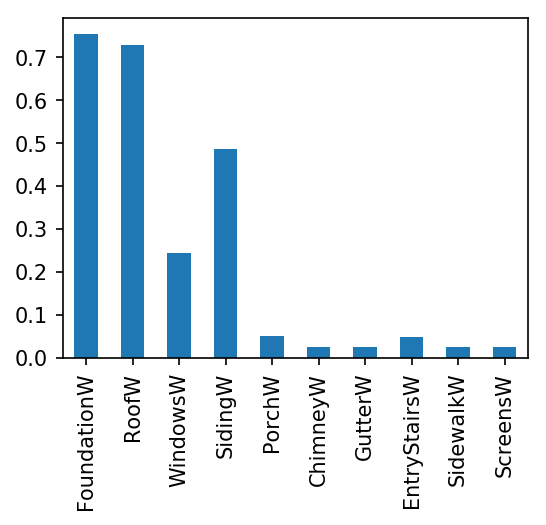

In [0]:
df[weightedlist].mean().plot(kind='bar')

In [0]:
unweightedlist = ['FoundationU', 'RoofU', 'WindowsU', 'PorchU', 'ChimneyU', 'GutterU', 'EntryStairsU', 'SidewalkU', 'ScreensU']

df['FoundationU'] = df['Foundation'].fillna(df['Foundation'].mean())
df['RoofU'] = df['Roof'].fillna(df['Roof'].mean())
df['WindowsU'] = df['Windows'].fillna(df['Windows'].mean())
df['PorchU'] = df['Porch'].fillna(df['Porch'].mean())
df['ScreensU'] = df['Screens'].fillna(df['Screens'].mean())
df['ChimneyU'] = df['Chimney'].fillna(df['Chimney'].mean())
df['GutterU'] = df['Gutter'].fillna(df['Gutter'].mean())
df['SidewalkU'] = df['Sidewalk'].fillna(df['Sidewalk'].mean())
df['EntryStairsU'] = df['EntryStairs'].fillna(df['EntryStairs'].mean())

df[unweightedlist].mean()

FoundationU     2.511673
RoofU           2.428571
WindowsU        2.447674
PorchU          2.555874
ChimneyU        2.603448
GutterU         2.560078
EntryStairsU    2.482759
SidewalkU       2.571125
ScreensU        2.576200
dtype: float64

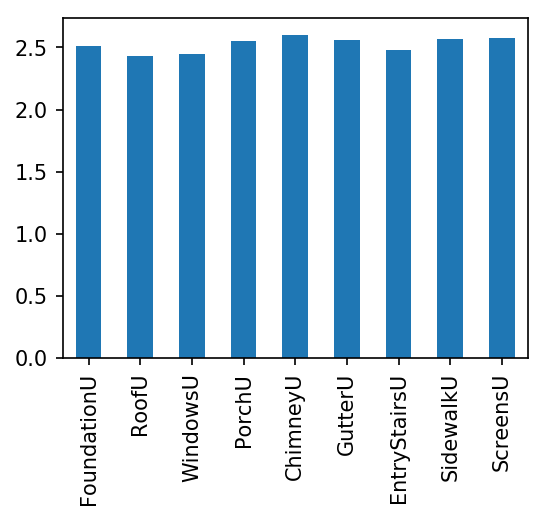

In [0]:
df[unweightedlist].mean().plot(kind='bar')

In [0]:
df['sumW'] = df[weightedlist].sum(axis=1)
df['sumU'] = df[unweightedlist].sum(axis=1)
df

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2,FoundationW,RoofW,SidingW,WindowsW,PorchW,EntryStairsW,ScreensW,ChimneyW,GutterW,SidewalkW,FoundationU,RoofU,WindowsU,PorchU,ScreensU,ChimneyU,GutterU,SidewalkU,EntryStairsU,sumW,sumU
0,12805,1,3,3.0,3.0,3.0,3,3,2.0,3.0,2.0,3.0,3.0,2.0,408 N LEE,NaN,0.900000,0.900000,0.6,0.3,0.040000,0.060000,0.020000,0.030000,0.03,0.030000,3.000000,3.000000,3,2.000000,2.0000,3.000000,3.0,3.000000,3.000000,2.910000,25.000000
1,12806,1,2,4.0,3.0,2.0,2,3,3.0,2.0,2.0,2.0,2.0,1.0,508 N LEE,NaN,0.600000,1.200000,0.4,0.3,0.040000,0.040000,0.030000,0.030000,0.02,0.020000,2.000000,4.000000,3,2.000000,3.0000,3.000000,2.0,2.000000,2.000000,2.680000,23.000000
2,12807,1,2,3.0,2.0,3.0,2,2,2.0,NaN,2.0,2.0,2.0,2.0,510 N LEE,NaN,0.600000,0.900000,0.4,0.2,0.040000,0.049655,0.020000,0.020000,0.03,0.020000,2.000000,3.000000,2,2.000000,2.0000,2.000000,3.0,2.000000,2.482759,2.279655,20.482759
3,12808,1,2,2.0,NaN,2.0,2,2,2.0,2.0,2.0,2.0,2.0,NaN,611 N LEE,NaN,0.600000,0.600000,0.4,0.2,0.040000,0.040000,0.020000,0.026034,0.02,0.020000,2.000000,2.000000,2,2.000000,2.0000,2.603448,2.0,2.000000,2.000000,1.966034,18.603448
4,13205,1,3,2.0,NaN,2.0,2,2,2.0,3.0,2.0,2.0,NaN,2.0,412 N LEE,NaN,0.600000,0.600000,0.4,0.2,0.040000,0.060000,0.020000,0.026034,0.02,0.025711,2.000000,2.000000,2,2.000000,2.0000,2.603448,2.0,2.571125,3.000000,1.991746,20.174574
5,13206,1,2,2.0,NaN,1.0,2,2,1.0,1.0,1.0,2.0,2.0,2.0,504 N LEE,Shed,0.600000,0.600000,0.4,0.2,0.020000,0.020000,0.010000,0.026034,0.01,0.020000,2.000000,2.000000,2,1.000000,1.0000,2.603448,1.0,2.000000,1.000000,1.906034,14.603448
6,13207,1,2,2.0,NaN,2.0,2,2,2.0,2.0,NaN,2.0,2.0,2.0,608 N LEE,NaN,0.600000,0.600000,0.4,0.2,0.051117,0.040000,0.020000,0.026034,0.02,0.020000,2.000000,2.000000,2,2.555874,2.0000,2.603448,2.0,2.000000,2.000000,1.977152,19.159322
7,13208,1,2,3.0,NaN,3.0,3,3,3.0,2.0,2.0,3.0,2.0,2.0,612 N LEE,Garage,0.900000,0.900000,0.6,0.3,0.040000,0.040000,0.030000,0.026034,0.03,0.020000,3.000000,3.000000,3,2.000000,3.0000,2.603448,3.0,2.000000,2.000000,2.886034,23.603448
8,13210,1,1,2.0,NaN,2.0,2,2,2.0,2.0,3.0,2.0,NaN,2.0,607 N LEE,Fence,0.600000,0.600000,0.4,0.2,0.060000,0.040000,0.020000,0.026034,0.02,0.025711,2.000000,2.000000,2,3.000000,2.0000,2.603448,2.0,2.571125,2.000000,1.991746,20.174574
9,13212,1,3,4.0,2.0,2.0,2,2,2.0,2.0,3.0,3.0,2.0,3.0,505 N LEE,NaN,0.900000,1.200000,0.4,0.2,0.060000,0.040000,0.020000,0.020000,0.02,0.020000,3.000000,4.000000,2,3.000000,2.0000,2.000000,2.0,2.000000,2.000000,2.880000,22.000000


**1** - Excellent, **2** - Good, **3** - Fair, **4** - Poor

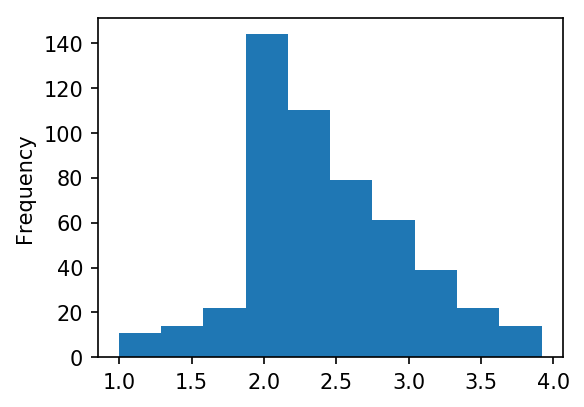

In [0]:
df['sumW'].plot(kind='hist')


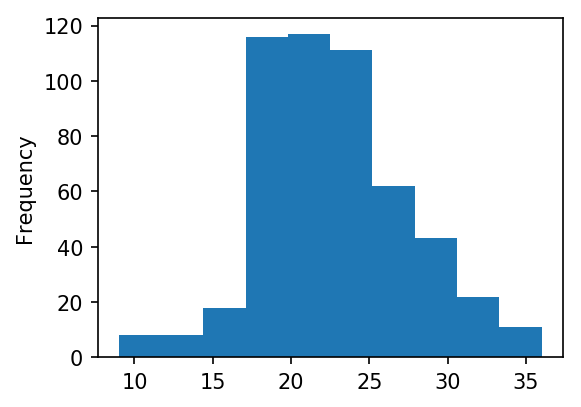

In [0]:
df['sumU'].plot(kind='hist')

## Overall Structure Scores Summary

code: https://stackoverflow.com/questions/40710811/count-items-greater-than-a-value-in-pandas-groupby/40710862


**1** - Excellent, **2** - Good, **3** - Fair, **4** - Poor

*Number of properties with overall score less than 2* **(Good)**

**159** properties have a score between 1 and 2 : **30.81%** are good

In [0]:
df[df['sumW'] < 2].groupby('Type_')['sumW'].count()


Type_
1    159
Name: sumW, dtype: int64

Number of properties with overall score less than 3 **(Fair)**

Note: Out of 501 properties, **433** properties are scored 0-2. Therefore, number of properties in sound condition are 433 - 159 = 274, which is **53.10%**

In [0]:
df[df['sumW'] < 3].groupby('Type_')['sumW'].count()


Type_
1    433
Name: sumW, dtype: int64

Number of Properties with overall structure score of more than 3 **(Poor)**
83 out of 516 : **16.08%**

In [0]:
df[df['sumW'] > 3].groupby('Type_')['sumW'].count()


Type_
1    83
Name: sumW, dtype: int64

## **Percentage by columns**

Number of properties with scores for each component

In [0]:
df_byType = df.groupby(by='Type_')
df_byType['Foundation'].value_counts()


Type_  Foundation
1      2.0           267
       3.0           180
       4.0            50
       1.0            17
Name: Foundation, dtype: int64

**Foundation:** **9.6%** poor. **34.8%** fair. **51.7%** good. **3.2%** excellent.

In [0]:
df_byType = df.groupby(by='Type_')
df_byType['Roof'].value_counts()


Type_  Roof
1      2.0     273
       3.0     143
       4.0      57
       1.0      38
Name: Roof, dtype: int64

**Roof**: **11.04%** poor. **27.7%** fair. **52.90%** good. **7.3%** excellent.

In [0]:
df_byType = df.groupby(by='Type_')
df_byType['Windows'].value_counts()



Type_  Windows
1      2          288
       3          138
       4           61
       1           29
Name: Windows, dtype: int64

**Windows**: **11.8%** poor. **26.7%** fair. **55.81** good. **5.6%** excellent.

In [0]:
df_byType = df.groupby(by='Type_')
df_byType['PublicSidewalk'].value_counts()


Type_  PublicSidewalk
1      2                 325
       1                  88
       3                  74
       4                  29
Name: PublicSidewalk, dtype: int64

**PublicSidewalk**: **5.6%** poor. **14.3%** fair. **62.98%** good. **5.6%** excellent.

In [0]:
df_byType = df.groupby(by='Type_')
df_byType['Chimney'].value_counts()


Type_  Chimney
1      2.0        159
       3.0        135
       4.0         43
       1.0         11
Name: Chimney, dtype: int64

**Chimney**: **8.3%** poor. **26.1%** fair. **30.81%** good. **2.13%** excellent.

In [0]:
df_byType = df.groupby(by='Type_')
df_byType['Porch'].value_counts()


Type_  Porch
1      2.0      154
       3.0      124
       4.0       47
       1.0       24
Name: Porch, dtype: int64

**Porch**: **9.1%** poor. **24%** fair. **29.84** good. **4.65%** excellent.

In [0]:
df_byType = df.groupby(by='Type_')
df_byType['Gutter'].value_counts()


Type_  Gutter
1      2.0       263
       3.0       139
       4.0        88
       1.0        26
Name: Gutter, dtype: int64

**Gutter**: **17.05%** are poor. **26.9%** are fair. **50.96%** good. **5.03%** excellent.

In [0]:
df_byType = df.groupby(by='Type_')
df_byType['Siding'].value_counts()


Type_  Siding
1      2         284
       3         147
       4          53
       1          32
Name: Siding, dtype: int64

**Siding**: **10.2%** poor. **28.4%** fair. **55.03%** good.**6.2%** excellent.

In [0]:
df_byType = df.groupby(by='Type_')
df_byType['Screens'].value_counts()


Type_  Screens
1      2.0        217
       3.0        158
       4.0         74
       1.0         30
Name: Screens, dtype: int64

**Screens**: **14.3%** poor. **30.6%** fair. **42.05%** good. **5.8%** excellent.

In [0]:
#EntryStairs are the Porch Stairs from 2008 report
df_byType = df.groupby(by='Type_')
df_byType['EntryStairs'].value_counts()


Type_  EntryStairs
1      2.0            274
       3.0            116
       4.0             75
       1.0             28
Name: EntryStairs, dtype: int64

**Entry Stairs** : **14.5%** poor. **22.4%** fair. **53.10%** good. **5.4%** excellent.

In [0]:
df_byType = df.groupby(by='Type_')
df_byType['Driveway'].value_counts()


Type_  Driveway
1      2.0         166
       3.0         105
       4.0         104
       1.0          15
Name: Driveway, dtype: int64

**Driveway**: **20.15%** poor. **20.3%** fair. **32.17%** good. **2.9%** excellent.

In [0]:
df_byType = df.groupby(by='Type_')
df_byType['Sidewalk'].value_counts()


Type_  Sidewalk
1      2.0         232
       3.0         119
       4.0          90
       1.0          30
Name: Sidewalk, dtype: int64

**Sidewalk**: **17.44%** poor. **23.06%** fair. **44.96%** good. **5.8%** excellent.

## **Rows containing overall weighted property scores between 3 and 4 **

**Poor properties**

In [0]:
#creating variable that returns true if sum is greater than 3 (score between 3 and 4 is poor)
poor = df['sumW'] > 3
df[poor]

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2,FoundationW,RoofW,SidingW,WindowsW,PorchW,EntryStairsW,ScreensW,ChimneyW,GutterW,SidewalkW,FoundationU,RoofU,WindowsU,PorchU,ScreensU,ChimneyU,GutterU,SidewalkU,EntryStairsU,sumW,sumU
29,16405,1,2,4.0,NaN,3.0,3,4,NaN,NaN,NaN,3.0,4.0,3.0,901 w washington,NaN,0.9,1.200000,0.6,0.4,0.051117,0.049655,0.025762,0.026034,0.03,0.040000,3.0,4.000000,4,2.555874,2.5762,2.603448,3.0,4.000000,2.482759,3.322569,28.218281
37,18412,1,2,4.0,3.0,4.0,4,2,2.0,4.0,4.0,3.0,4.0,3.0,519 W GROVE,NaN,0.9,1.200000,0.8,0.2,0.080000,0.080000,0.020000,0.030000,0.04,0.040000,3.0,4.000000,2,4.000000,2.0000,3.000000,4.0,4.000000,4.000000,3.390000,30.000000
44,18807,1,2,NaN,3.0,4.0,3,3,3.0,4.0,4.0,4.0,3.0,4.0,518 W GROVE,NaN,1.2,0.728571,0.6,0.3,0.080000,0.080000,0.030000,0.030000,0.04,0.030000,4.0,2.428571,3,4.000000,3.0000,3.000000,4.0,3.000000,4.000000,3.118571,30.428571
51,19214,1,2,4.0,4.0,4.0,4,4,4.0,3.0,3.0,4.0,NaN,2.0,812 w Washington,Fence,1.2,1.200000,0.8,0.4,0.060000,0.060000,0.040000,0.040000,0.04,0.025711,4.0,4.000000,4,3.000000,4.0000,4.000000,4.0,2.571125,3.000000,3.865711,32.571125
78,21209,1,2,4.0,3.0,3.0,3,3,4.0,2.0,3.0,3.0,2.0,3.0,605 W GROVE,Shed,0.9,1.200000,0.6,0.3,0.060000,0.040000,0.040000,0.030000,0.03,0.020000,3.0,4.000000,3,3.000000,4.0000,3.000000,3.0,2.000000,2.000000,3.220000,27.000000
82,23208,1,2,4.0,NaN,4.0,3,2,2.0,3.0,4.0,3.0,2.0,3.0,204 N Allin,NaN,0.9,1.200000,0.6,0.2,0.080000,0.060000,0.020000,0.026034,0.04,0.020000,3.0,4.000000,2,4.000000,2.0000,2.603448,4.0,2.000000,3.000000,3.146034,26.603448
85,24808,1,2,3.0,4.0,4.0,3,4,4.0,3.0,4.0,4.0,2.0,3.0,104 N Allin,NaN,1.2,0.900000,0.6,0.4,0.080000,0.060000,0.040000,0.040000,0.04,0.020000,4.0,3.000000,4,4.000000,4.0000,4.000000,4.0,2.000000,3.000000,3.380000,32.000000
86,24809,1,2,3.0,NaN,4.0,4,4,4.0,4.0,4.0,3.0,4.0,NaN,107 S Allin,NaN,0.9,0.900000,0.8,0.4,0.080000,0.080000,0.040000,0.026034,0.04,0.040000,3.0,3.000000,4,4.000000,4.0000,2.603448,4.0,4.000000,4.000000,3.306034,32.603448
94,24817,1,3,4.0,3.0,4.0,3,3,3.0,4.0,4.0,3.0,4.0,4.0,310 S Low,NaN,0.9,1.200000,0.6,0.3,0.080000,0.080000,0.030000,0.030000,0.04,0.040000,3.0,4.000000,3,4.000000,3.0000,3.000000,4.0,4.000000,4.000000,3.300000,32.000000
97,25208,1,2,4.0,4.0,4.0,3,3,NaN,3.0,NaN,3.0,NaN,4.0,104 S Allin,Shed,0.9,1.200000,0.6,0.3,0.051117,0.060000,0.025762,0.040000,0.04,0.025711,3.0,4.000000,3,2.555874,2.5762,4.000000,4.0,2.571125,3.000000,3.242591,28.703200


**Critical Properties**



In [0]:
critical = df['sumW'] > 3.5
df[critical]

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2,FoundationW,RoofW,SidingW,WindowsW,PorchW,EntryStairsW,ScreensW,ChimneyW,GutterW,SidewalkW,FoundationU,RoofU,WindowsU,PorchU,ScreensU,ChimneyU,GutterU,SidewalkU,EntryStairsU,sumW,sumU
51,19214,1,2,4.0,4.0,4.0,4,4,4.0,3.0,3.0,4.0,NaN,2.0,812 w Washington,Fence,1.2,1.2,0.8,0.4,0.060000,0.060000,0.040000,0.040000,0.04,0.025711,4.0,4.0,4,3.000000,4.0000,4.000000,4.0,2.571125,3.000000,3.865711,32.571125
100,25211,1,2,3.0,NaN,3.0,4,4,4.0,4.0,NaN,4.0,NaN,4.0,301 S Low,NaN,1.2,0.9,0.8,0.4,0.051117,0.080000,0.040000,0.026034,0.03,0.025711,4.0,3.0,4,2.555874,4.0000,2.603448,3.0,2.571125,4.000000,3.552863,29.730447
104,25610,1,2,4.0,NaN,4.0,3,4,NaN,4.0,4.0,4.0,NaN,NaN,302 S Allin,NaN,1.2,1.2,0.6,0.4,0.080000,0.080000,0.025762,0.026034,0.04,0.025711,4.0,4.0,4,4.000000,2.5762,2.603448,4.0,2.571125,4.000000,3.677508,31.750774
115,26009,1,4,4.0,NaN,4.0,4,4,4.0,4.0,4.0,4.0,4.0,4.0,306 S Low,NaN,1.2,1.2,0.8,0.4,0.080000,0.080000,0.040000,0.026034,0.04,0.040000,4.0,4.0,4,4.000000,4.0000,2.603448,4.0,4.000000,4.000000,3.906034,34.603448
116,26010,1,3,4.0,3.0,4.0,3,3,3.0,4.0,4.0,4.0,4.0,4.0,814 W Front,NaN,1.2,1.2,0.6,0.3,0.080000,0.080000,0.030000,0.030000,0.04,0.040000,4.0,4.0,3,4.000000,3.0000,3.000000,4.0,4.000000,4.000000,3.600000,33.000000
133,28008,1,1,4.0,3.0,4.0,3,4,4.0,3.0,NaN,4.0,2.0,NaN,901 w Jefferson,NaN,1.2,1.2,0.6,0.4,0.051117,0.060000,0.040000,0.030000,0.04,0.020000,4.0,4.0,4,2.555874,4.0000,3.000000,4.0,2.000000,3.000000,3.641117,30.555874
137,28409,1,2,3.0,4.0,4.0,4,4,4.0,4.0,4.0,4.0,2.0,2.0,304 N Allin,NaN,1.2,0.9,0.8,0.4,0.080000,0.080000,0.040000,0.040000,0.04,0.020000,4.0,3.0,4,4.000000,4.0000,4.000000,4.0,2.000000,4.000000,3.600000,33.000000
141,29209,1,2,4.0,4.0,4.0,3,3,4.0,4.0,4.0,4.0,3.0,NaN,706 W Jefferson,NaN,1.2,1.2,0.6,0.3,0.080000,0.080000,0.040000,0.040000,0.04,0.030000,4.0,4.0,3,4.000000,4.0000,4.000000,4.0,3.000000,4.000000,3.610000,34.000000
186,33610,1,2,4.0,4.0,3.0,4,4,4.0,2.0,2.0,4.0,2.0,NaN,708 W Jefferson,NaN,1.2,1.2,0.8,0.4,0.040000,0.040000,0.040000,0.040000,0.03,0.020000,4.0,4.0,4,2.000000,4.0000,4.000000,3.0,2.000000,2.000000,3.810000,29.000000
187,33611,1,2,4.0,3.0,4.0,4,4,3.0,2.0,3.0,3.0,2.0,3.0,605 W Jefferson,NaN,0.9,1.2,0.8,0.4,0.060000,0.040000,0.030000,0.030000,0.04,0.020000,3.0,4.0,4,3.000000,3.0000,3.000000,4.0,2.000000,2.000000,3.520000,28.000000
